# DMart Products

## Q1. Import csv file and perform exploratory data analysis by identifying size of the datasets, column information and missing values.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### A. Read CSV file

In [29]:
df = pd.read_csv('DMart.csv')
df

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits
...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs


### B. Dataset size

In [30]:
df.size

46701

### C. Column information

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


### D. Check for missing values

In [32]:
df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

## Q2. Identify Top 10 Most Product Categories having highest products and plot graph for the same.

Top 10 Categories with Highest Number of Products:

Category
Personal Care             1234
Packaged Food             1125
Home & Kitchen             880
Grocery                    840
Dairy & Beverages          429
Specials                   187
Clothing & Accessories      97
Fruits & Vegetables         78
School Supplies             69
Appliances                  53
Name: count, dtype: int64


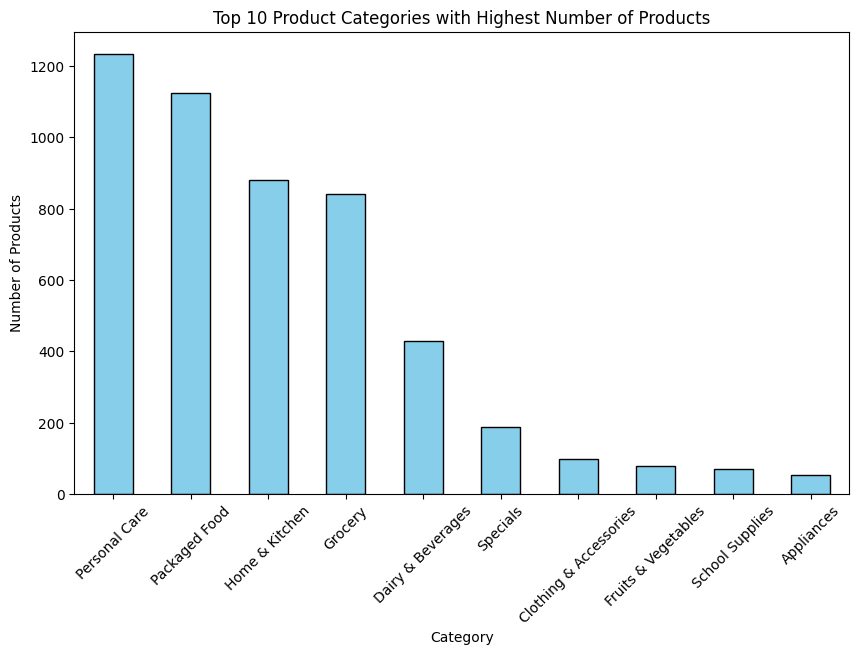

In [33]:
category_counts = df['Category'].value_counts().head(10)

print("Top 10 Categories with Highest Number of Products:\n")
print(category_counts)

plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Product Categories with Highest Number of Products")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

## Q3. Perform following operations.

### A. Fill the missing value of Brand with value ‘Others’.

In [36]:
df['Brand'] = df['Brand'].fillna('Others')

### B. Find out 10 brands which are having highest products.

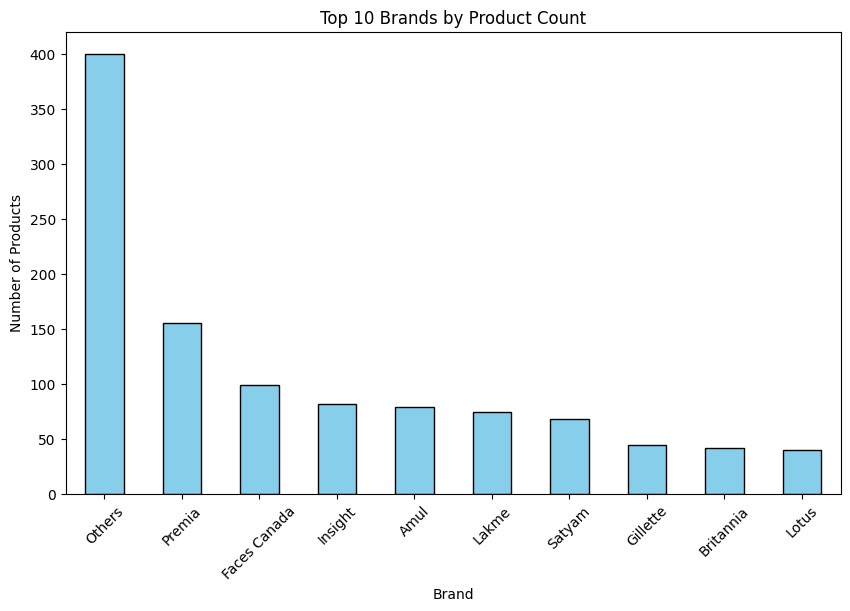

In [37]:
top_10_brands = df['Brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_10_brands.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


### C. Identify and Remove columns which are not useful for data analysis.

In [38]:
cols_to_drop = ['Description', 'BreadCrumbs', 'Quantity', 'ProductID', 'URL']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

print("Remaining Columns:\n", df.columns)


Remaining Columns:
 Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory'], dtype='object')


## Q4. Implement Naive Bayes classifier to predict product category. Perform lable encoding if required.

In [43]:
cols_to_drop = ['Description', 'BreadCrumbs', 'Quantity', 'ProductID', 'URL']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# Fill missing values
df['Brand'] = df['Brand'].fillna('Others')
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['DiscountedPrice'] = df['DiscountedPrice'].fillna(df['DiscountedPrice'].mean())

# Label Encoding
df['Brand'] = LabelEncoder().fit_transform(df['Brand'])
df['SubCategory'] = LabelEncoder().fit_transform(df['SubCategory'])
df['Category'] = LabelEncoder().fit_transform(df['Category'])

X = df[['Brand', 'SubCategory', 'Price', 'DiscountedPrice']]
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3815028901734104

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.80      0.55        10
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         1
           7       0.18      0.40      0.25         5
           8       0.34      0.85      0.48        75
           9       1.00      0.94      0.97        17
          11       0.17      0.01      0.02       197
          12       0.38      0.13      0.20       150
          13       0.00      0.00      0.00         1
          16       0.31      0.71      0.43       226
          17       0.50      0.33      0.40       256
          18       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         4
          20       1.00    

C:\Users\luxlu\OneDrive\Desktop\Git Hub\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\luxlu\OneDrive\Desktop\Git Hub\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\luxlu\OneDrive\Desktop\Git Hub\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi